# Stocks Clustering

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
data=pd.read_csv('data_stocks.csv')

In [24]:
data.shape

(41266, 502)

In [25]:
data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [26]:
data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


In [27]:
data.info

<bound method DataFrame.info of              DATE      SP500  NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  \
0      1491226200  2363.6101     42.3300     143.6800     129.6300   
1      1491226260  2364.1001     42.3600     143.7000     130.3200   
2      1491226320  2362.6799     42.3100     143.6901     130.2250   
3      1491226380  2364.3101     42.3700     143.6400     130.0729   
4      1491226440  2364.8501     42.5378     143.6600     129.8800   
...           ...        ...         ...          ...          ...   
41261  1504209360  2472.2200     44.7200     164.1100     155.0900   
41262  1504209420  2471.7700     44.7300     164.1200     155.1600   
41263  1504209480  2470.0300     44.7400     164.0100     155.0650   
41264  1504209540  2471.4900     44.7100     163.8800     154.9600   
41265  1504209600  2471.4900     44.7400     163.9800     155.1600   

       NASDAQ.ADI  NASDAQ.ADP  NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  ...  \
0          82.040    102.2300      85.2200       5

In [28]:
data.isnull().sum().any()

False

In [29]:
data.isnull().values.any()

False

In [30]:
data.isnull().values.sum()

0

In [31]:
df=data.copy()

In [33]:
#since date and sp 500 column not contibuting much, remove it
df.drop(['DATE','SP500'],axis=1,inplace=True)

In [34]:
print(df.shape)
df.head()

(41266, 500)


,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,14.61,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,14.71,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,14.64,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,14.63,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,14.67,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [115]:
df_corr=df.corr()

In [116]:
df_corr

,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,NASDAQ.AMD,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
NASDAQ.AAL,1.000000,0.082065,0.542213,0.209446,0.245801,0.610881,-0.441142,0.009581,0.681863,0.272518,...,0.798624,-0.744085,0.284370,0.810955,-0.070950,0.522341,0.395730,0.642336,0.588241,0.753567
NASDAQ.AAPL,0.082065,1.000000,0.714578,0.264269,0.265641,0.645233,-0.712522,0.326712,0.545541,-0.238091,...,0.306664,-0.250959,0.738655,0.266994,-0.671488,0.341687,0.693062,0.627531,-0.580055,0.442600
NASDAQ.ADBE,0.542213,0.714578,1.000000,0.259282,0.476496,0.872353,-0.759604,0.488717,0.733609,0.201821,...,0.718851,-0.792876,0.850709,0.722161,-0.758967,0.806615,0.911106,0.939185,-0.067235,0.776052
NASDAQ.ADI,0.209446,0.264269,0.259282,1.000000,-0.085074,0.470756,-0.323603,-0.409747,0.504019,0.042083,...,0.203224,-0.160317,0.308948,0.050697,-0.024428,-0.017967,0.067258,0.261173,0.130786,0.351893
NASDAQ.ADP,0.245801,0.265641,0.476496,-0.085074,1.000000,0.325630,-0.229119,0.572143,0.099934,0.447506,...,0.321414,-0.438662,0.443773,0.347293,-0.463670,0.589464,0.634191,0.418591,-0.201805,0.160213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NYSE.XRX,0.522341,0.341687,0.806615,-0.017967,0.589464,0.577194,-0.542393,0.696062,0.371468,0.450787,...,0.605548,-0.867222,0.636184,0.717401,-0.623126,1.000000,0.866193,0.785073,0.081512,0.588426
NYSE.XYL,0.395730,0.693062,0.911106,0.067258,0.634191,0.701701,-0.668413,0.679090,0.485314,0.261115,...,0.548014,-0.737225,0.811981,0.610465,-0.798461,0.866193,1.000000,0.842826,-0.246085,0.581894
NYSE.YUM,0.642336,0.627531,0.939185,0.261173,0.418591,0.915175,-0.863792,0.343294,0.770276,0.083384,...,0.825260,-0.862418,0.855050,0.763547,-0.634492,0.785073,0.842826,1.000000,0.018217,0.899693
NYSE.ZBH,0.588241,-0.580055,-0.067235,0.130786,-0.201805,0.016689,0.212780,-0.259731,0.236575,0.417055,...,0.369747,-0.322979,-0.310343,0.339366,0.458027,0.081512,-0.246085,0.018217,1.000000,0.271767


In [117]:
upper_tri = df_corr.where(np.triu(np.ones(df_corr.shape),k=1).astype(np.bool))
print(upper_tri)

             NASDAQ.AAL  NASDAQ.AAPL  NASDAQ.ADBE  NASDAQ.ADI  NASDAQ.ADP  \
NASDAQ.AAL          NaN     0.082065     0.542213    0.209446    0.245801   
NASDAQ.AAPL         NaN          NaN     0.714578    0.264269    0.265641   
NASDAQ.ADBE         NaN          NaN          NaN    0.259282    0.476496   
NASDAQ.ADI          NaN          NaN          NaN         NaN   -0.085074   
NASDAQ.ADP          NaN          NaN          NaN         NaN         NaN   
...                 ...          ...          ...         ...         ...   
NYSE.XRX            NaN          NaN          NaN         NaN         NaN   
NYSE.XYL            NaN          NaN          NaN         NaN         NaN   
NYSE.YUM            NaN          NaN          NaN         NaN         NaN   
NYSE.ZBH            NaN          NaN          NaN         NaN         NaN   
NYSE.ZTS            NaN          NaN          NaN         NaN         NaN   

             NASDAQ.ADSK  NASDAQ.AKAM  NASDAQ.ALXN  NASDAQ.AMAT  NASDAQ.AMD

In [118]:
pos_corr_pair=[]
for column in upper_tri.columns :
    lst=upper_tri[upper_tri[column]>0.95].index.tolist()
    if len(lst) > 0:
        pos_corr_pair.append([column,lst])


In [119]:
len(pos_corr_pair)

91

In [120]:
similar_stocks=pd.DataFrame(pos_corr_pair,columns=['Stock','List_of_similar_stocks'])

In [121]:
#list of stocks which are 95% similar in performance
similar_stocks

,Stock,List_of_similar_stocks
0,NASDAQ.ATVI,[NASDAQ.ADBE]
1,NASDAQ.CELG,[NASDAQ.AMGN]
2,NASDAQ.CTSH,[NASDAQ.ATVI]
3,NASDAQ.DISCK,[NASDAQ.DISCA]
4,NASDAQ.EA,"[NASDAQ.ATVI, NASDAQ.CTSH]"
...,...,...
86,NYSE.WEC,"[NYSE.DUK, NYSE.LNT]"
87,NYSE.XEL,"[NYSE.CMS, NYSE.DTE, NYSE.DUK, NYSE.NI, NYSE.WEC]"
88,NYSE.XYL,"[NASDAQ.CBOE, NYSE.BA, NYSE.HIG, NYSE.LMT, NYS..."
89,NYSE.YUM,"[NASDAQ.ATVI, NASDAQ.CTSH, NASDAQ.ISRG, NASDAQ..."


In [142]:
neg_corr_pair=[]
for column in upper_tri.columns :
    lst=upper_tri[upper_tri[column]<-0.90].index.tolist()
    if len(lst) > 0:
        neg_corr_pair.append([column,lst])

In [144]:
len(neg_corr_pair)

114

In [145]:
dissimilar_stocks=pd.DataFrame(neg_corr_pair,columns=['Stock','List_of_dissimilar_stocks'])

In [148]:
#list of stocks which are 95% different in performance
dissimilar_stocks

,Stock,List_of_dissimilar_stocks
0,NASDAQ.BBBY,[NASDAQ.ADBE]
1,NASDAQ.CBOE,[NASDAQ.BBBY]
2,NASDAQ.CTSH,[NASDAQ.BBBY]
3,NASDAQ.MAT,[NASDAQ.CBOE]
4,NASDAQ.NVDA,[NASDAQ.BBBY]
...,...,...
109,NYSE.XEL,"[NYSE.FLR, NYSE.HP]"
110,NYSE.XRX,"[NASDAQ.ROST, NYSE.AAP, NYSE.KR, NYSE.NFX]"
111,NYSE.XYL,"[NASDAQ.MAT, NASDAQ.STX, NYSE.CMG, NYSE.GE, NY..."
112,NYSE.YUM,"[NYSE.APC, NYSE.DVN, NYSE.FL, NYSE.FTI, NYSE.H..."


In [210]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++')
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
    

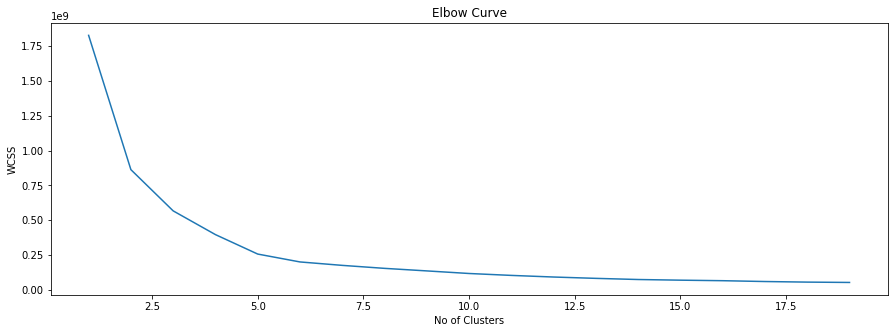

In [214]:
plt.figure(figsize=(15,5))
plt.plot(range(1,20),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Curve')
plt.show()

In [213]:
#here we can take 4 or 5 clusters
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans.fit(df)
y_kmeans = kmeans.predict(df)
y_kmeans

array([0, 0, 0, ..., 3, 3, 3])

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(df)
pc

array([[ 306.7014591 ,   83.2240155 ],
       [ 303.07353165,   79.13615476],
       [ 301.07978706,   78.29811525],
       ...,
       [-195.96140814,  118.43969002],
       [-195.00245926,  118.98135157],
       [-196.53458095,  117.44181957]])

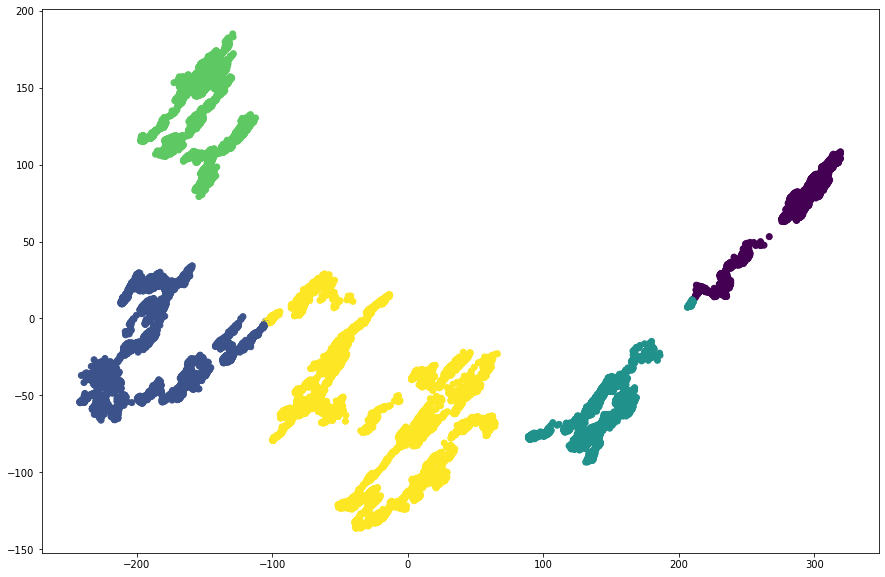

In [222]:
y_kmeans = kmeans.predict(df)
plt.figure(figsize=(15,10))
plt.scatter(pc[:, 0],pc[:, 1], c=y_kmeans)

Text(0, 0.5, 'Count')

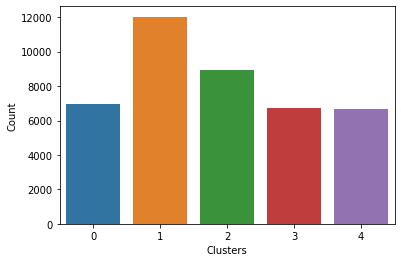

In [223]:
import seaborn as sns
unique_elements,np.unique(y_kmeans,return_counts=True)
sns.barplot(x=unique_elements,y=count)
plt.xlabel('Clusters')
plt.ylabel('Count')